In [1]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [2]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


# Canonical_smiles To secuence

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-08-31 00:20:21.920700: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-31 00:20:21.933485: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 00:20:22.445940: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 00:20:22.456261: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 00:20:26.507185: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [5]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [6]:
min_sequence_length = df['canonical_smiles'].apply(len).min()
max_sequence_length = df['canonical_smiles'].apply(len).max()

In [11]:
max_sequence_length

204

In [7]:
X = df['canonical_smiles']
y = df['pIC50']

In [8]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Extract canonical smiles from the DataFrame
canonical_smiles = X.tolist()

# Initialize the Tokenizer
tokenizer = Tokenizer(char_level=True)

# Fit the tokenizer on the canonical smiles
tokenizer.fit_on_texts(canonical_smiles)

# Tokenize and pad the canonical smiles sequences
canonical_smiles_tokenized = tokenizer.texts_to_sequences(canonical_smiles)
max_sequence_length = max(map(len, canonical_smiles_tokenized))
canonical_smiles_padded = pad_sequences(canonical_smiles_tokenized, 
                                        maxlen=max_sequence_length)

# Convert padded sequences to a numpy array
X_seq_pad = np.array(canonical_smiles_padded)

In [ ]:
X_seq_pad.shape[1]

204

In [ ]:
# Find rows with inf values
rows_with_inf = np.any(np.isinf(X_seq_pad), axis=1)

# Remove rows with inf values
X_seq_pad = X_seq_pad[~rows_with_inf]

X_seq_pad.shape

In [98]:
X_seq_pad[200]

array([ 8,  1,  5,  1,  7,  1,  3, 13,  1, 10,  1,  5,  2,  2,  2,  2, 10,
        4,  2,  2,  2,  2,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

# Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Convert labels to a numpy array
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, labels_array, test_size=0.2, random_state=999)
X_train = np.delete(X_train,slice(4100,4150),axis=0)
y_train = np.delete(y_train,slice(4100,4150),axis=0)

In [37]:
len(X_train), len(y_train), len(X_test) , len(y_test)

(4875, 4875, 1232, 1232)

# Network Model

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [39]:
# Métrica
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [40]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(list(tokenizer.word_index.keys()))

In [41]:
max_sequence_len = len(max(X_seq_pad, key=len))

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [108]:
X_train[0]

array([ 2,  2,  6,  2,  3,  9,  6,  4,  2,  5,  9,  2,  3,  2,  4,  6,  1,
        7, 13,  1, 10,  1,  3,  1,  3,  8,  4,  1,  7, 11,  2, 14, 16, 12,
        5,  1,  5,  1,  1,  1,  1,  3,  6,  2,  4,  1,  5,  4,  2,  2,  2,
        2,  2, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [73]:
del(model)

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, BatchNormalization, Activation, LSTM
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Build the sequential model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X_seq_pad.shape[1]))

# Bidirectional LSTM layer with L2 regularization
model.add(Bidirectional(LSTM(125, return_sequences=False, kernel_regularizer=l2(0.01))))

# Dense layer with L2 regularization
model.add(Dense(1000, kernel_regularizer=l2(0.01)))

# Batch normalization layer
model.add(BatchNormalization())

# Activation layer
model.add(Activation('relu'))

# Output dense layer
model.add(Dense(1))

# Print the model summary
model.summary()

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001, clipvalue=0.1), loss='mse', metrics=[R2])




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 204, 128)          4992      
                                                                 
 bidirectional_3 (Bidirecti  (None, 250)               254000    
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 1000)              251000    
                                                                 
 batch_normalization_3 (Bat  (None, 1000)              4000      
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 1000)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [45]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [75]:
#history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[mcp])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping,mcp])

Epoch 1/100
153/153 [==============================] - 22s 128ms/step - loss: 7.3442 - R2: -1.0467 - val_loss: 22.5147 - val_R2: -8.1710 - lr: 0.0010
Epoch 2/100
153/153 [==============================] - 19s 123ms/step - loss: 3.8766 - R2: -0.1698 - val_loss: 10.2225 - val_R2: -2.9737 - lr: 0.0010
Epoch 3/100
153/153 [==============================] - 19s 122ms/step - loss: 3.0723 - R2: 0.0154 - val_loss: 5.8591 - val_R2: -1.1917 - lr: 0.0010
Epoch 4/100
153/153 [==============================] - 19s 123ms/step - loss: 2.6129 - R2: 0.0951 - val_loss: 3.3504 - val_R2: -0.1661 - lr: 0.0010
Epoch 5/100
153/153 [==============================] - 19s 123ms/step - loss: 2.3413 - R2: 0.1468 - val_loss: 5.9567 - val_R2: -1.3841 - lr: 0.0010
Epoch 6/100
153/153 [==============================] - 19s 123ms/step - loss: 2.2042 - R2: 0.1643 - val_loss: 2.4497 - val_R2: 0.0776 - lr: 0.0010
Epoch 7/100
153/153 [==============================] - 19s 126ms/step - loss: 2.1088 - R2: 0.1768 - val_loss:

INFO:tensorflow:Assets written to: models/best_model_9/assets


153/153 [==============================] - 26s 172ms/step - loss: 1.9895 - R2: 0.1980 - val_loss: 2.0839 - val_R2: 0.2104 - lr: 0.0010
Epoch 10/100
153/153 [==============================] - 21s 134ms/step - loss: 1.9697 - R2: 0.2206 - val_loss: 4.0024 - val_R2: -0.6740 - lr: 0.0010
Epoch 11/100
153/153 [==============================] - 19s 123ms/step - loss: 1.8940 - R2: 0.2258 - val_loss: 5.2239 - val_R2: -1.2102 - lr: 0.0010
Epoch 12/100
153/153 [==============================] - 20s 128ms/step - loss: 1.8848 - R2: 0.2384 - val_loss: 3.5346 - val_R2: -0.4288 - lr: 0.0010
Epoch 13/100
153/153 [==============================] - 19s 125ms/step - loss: 1.8426 - R2: 0.2540 - val_loss: 2.2920 - val_R2: 0.0862 - lr: 0.0010
Epoch 14/100
153/153 [==============================] - 21s 138ms/step - loss: 1.8096 - R2: 0.2589 - val_loss: 3.1375 - val_R2: -0.2755 - lr: 0.0010
Epoch 15/100
153/153 [==============================] - 23s 150ms/step - loss: 1.6143 - R2: 0.3435 - val_loss: 3.0743 - v

INFO:tensorflow:Assets written to: models/best_model_18/assets


153/153 [==============================] - 26s 172ms/step - loss: 1.5479 - R2: 0.3666 - val_loss: 2.0712 - val_R2: 0.2010 - lr: 5.0000e-04
Epoch 19/100
153/153 [==============================] - ETA: 0s - loss: 1.5102 - R2: 0.3863INFO:tensorflow:Assets written to: models/best_model_19/assets


INFO:tensorflow:Assets written to: models/best_model_19/assets


153/153 [==============================] - 26s 168ms/step - loss: 1.5102 - R2: 0.3863 - val_loss: 2.0153 - val_R2: 0.1933 - lr: 5.0000e-04
Epoch 20/100
153/153 [==============================] - 20s 131ms/step - loss: 1.5203 - R2: 0.3788 - val_loss: 4.0253 - val_R2: -0.6430 - lr: 5.0000e-04
Epoch 21/100
153/153 [==============================] - 21s 136ms/step - loss: 1.4897 - R2: 0.3843 - val_loss: 2.1931 - val_R2: 0.1317 - lr: 5.0000e-04
Epoch 22/100
153/153 [==============================] - ETA: 0s - loss: 1.5078 - R2: 0.3829INFO:tensorflow:Assets written to: models/best_model_22/assets


INFO:tensorflow:Assets written to: models/best_model_22/assets


153/153 [==============================] - 26s 173ms/step - loss: 1.5078 - R2: 0.3829 - val_loss: 1.9358 - val_R2: 0.2273 - lr: 5.0000e-04
Epoch 23/100
153/153 [==============================] - ETA: 0s - loss: 1.4606 - R2: 0.3942INFO:tensorflow:Assets written to: models/best_model_23/assets


INFO:tensorflow:Assets written to: models/best_model_23/assets


153/153 [==============================] - 26s 170ms/step - loss: 1.4606 - R2: 0.3942 - val_loss: 1.8606 - val_R2: 0.2680 - lr: 5.0000e-04
Epoch 24/100
153/153 [==============================] - ETA: 0s - loss: 1.4791 - R2: 0.3948INFO:tensorflow:Assets written to: models/best_model_24/assets


INFO:tensorflow:Assets written to: models/best_model_24/assets


153/153 [==============================] - 25s 166ms/step - loss: 1.4791 - R2: 0.3948 - val_loss: 1.7543 - val_R2: 0.3076 - lr: 5.0000e-04
Epoch 25/100
153/153 [==============================] - 21s 135ms/step - loss: 1.4367 - R2: 0.4111 - val_loss: 2.2312 - val_R2: 0.0715 - lr: 5.0000e-04
Epoch 26/100
153/153 [==============================] - 21s 139ms/step - loss: 1.4339 - R2: 0.4155 - val_loss: 2.7995 - val_R2: -0.1813 - lr: 5.0000e-04
Epoch 27/100
153/153 [==============================] - 21s 138ms/step - loss: 1.4310 - R2: 0.4045 - val_loss: 1.7628 - val_R2: 0.3114 - lr: 5.0000e-04
Epoch 28/100
153/153 [==============================] - 22s 147ms/step - loss: 1.4161 - R2: 0.4226 - val_loss: 2.1966 - val_R2: 0.1337 - lr: 5.0000e-04
Epoch 29/100
153/153 [==============================] - 21s 140ms/step - loss: 1.4238 - R2: 0.4081 - val_loss: 2.3010 - val_R2: 0.0500 - lr: 5.0000e-04
Epoch 30/100
153/153 [==============================] - ETA: 0s - loss: 1.3058 - R2: 0.4692INFO:tens

INFO:tensorflow:Assets written to: models/best_model_30/assets


153/153 [==============================] - 28s 186ms/step - loss: 1.3058 - R2: 0.4692 - val_loss: 1.5239 - val_R2: 0.4074 - lr: 2.5000e-04
Epoch 31/100
153/153 [==============================] - 22s 142ms/step - loss: 1.2768 - R2: 0.4873 - val_loss: 1.5268 - val_R2: 0.4104 - lr: 2.5000e-04
Epoch 32/100
153/153 [==============================] - 22s 146ms/step - loss: 1.2553 - R2: 0.4937 - val_loss: 2.2316 - val_R2: 0.1208 - lr: 2.5000e-04
Epoch 33/100
153/153 [==============================] - 23s 147ms/step - loss: 1.2681 - R2: 0.4816 - val_loss: 2.0308 - val_R2: 0.1923 - lr: 2.5000e-04
Epoch 34/100
153/153 [==============================] - 23s 151ms/step - loss: 1.2610 - R2: 0.4883 - val_loss: 1.7842 - val_R2: 0.2867 - lr: 2.5000e-04
Epoch 35/100
153/153 [==============================] - 22s 142ms/step - loss: 1.2556 - R2: 0.4906 - val_loss: 2.4126 - val_R2: 0.0070 - lr: 2.5000e-04
Epoch 36/100
153/153 [==============================] - ETA: 0s - loss: 1.1977 - R2: 0.5123INFO:tenso

INFO:tensorflow:Assets written to: models/best_model_36/assets


153/153 [==============================] - 28s 186ms/step - loss: 1.1977 - R2: 0.5123 - val_loss: 1.5180 - val_R2: 0.4160 - lr: 1.2500e-04
Epoch 37/100
153/153 [==============================] - ETA: 0s - loss: 1.1697 - R2: 0.5320INFO:tensorflow:Assets written to: models/best_model_37/assets


INFO:tensorflow:Assets written to: models/best_model_37/assets


153/153 [==============================] - 28s 182ms/step - loss: 1.1697 - R2: 0.5320 - val_loss: 1.4946 - val_R2: 0.4251 - lr: 1.2500e-04
Epoch 38/100
153/153 [==============================] - ETA: 0s - loss: 1.1762 - R2: 0.5188INFO:tensorflow:Assets written to: models/best_model_38/assets


INFO:tensorflow:Assets written to: models/best_model_38/assets


153/153 [==============================] - 28s 182ms/step - loss: 1.1762 - R2: 0.5188 - val_loss: 1.4457 - val_R2: 0.4426 - lr: 1.2500e-04
Epoch 39/100
153/153 [==============================] - 22s 145ms/step - loss: 1.1775 - R2: 0.5184 - val_loss: 1.4912 - val_R2: 0.4252 - lr: 1.2500e-04
Epoch 40/100
153/153 [==============================] - 23s 148ms/step - loss: 1.1503 - R2: 0.5395 - val_loss: 1.5378 - val_R2: 0.4042 - lr: 1.2500e-04
Epoch 41/100
153/153 [==============================] - 23s 152ms/step - loss: 1.1637 - R2: 0.5176 - val_loss: 1.4968 - val_R2: 0.4293 - lr: 1.2500e-04
Epoch 42/100
153/153 [==============================] - 22s 147ms/step - loss: 1.1491 - R2: 0.5396 - val_loss: 1.4649 - val_R2: 0.4337 - lr: 1.2500e-04
Epoch 43/100
153/153 [==============================] - ETA: 0s - loss: 1.1646 - R2: 0.5266INFO:tensorflow:Assets written to: models/best_model_43/assets


INFO:tensorflow:Assets written to: models/best_model_43/assets


153/153 [==============================] - 28s 183ms/step - loss: 1.1646 - R2: 0.5266 - val_loss: 1.4382 - val_R2: 0.4440 - lr: 1.2500e-04
Epoch 44/100
153/153 [==============================] - 22s 143ms/step - loss: 1.1472 - R2: 0.5364 - val_loss: 1.4970 - val_R2: 0.4114 - lr: 1.2500e-04
Epoch 45/100
153/153 [==============================] - 23s 152ms/step - loss: 1.1410 - R2: 0.5364 - val_loss: 1.6317 - val_R2: 0.3671 - lr: 1.2500e-04
Epoch 46/100
153/153 [==============================] - 23s 149ms/step - loss: 1.1365 - R2: 0.5439 - val_loss: 1.4724 - val_R2: 0.4300 - lr: 1.2500e-04
Epoch 47/100
153/153 [==============================] - 23s 148ms/step - loss: 1.1325 - R2: 0.5414 - val_loss: 1.4615 - val_R2: 0.4292 - lr: 1.2500e-04
Epoch 48/100
153/153 [==============================] - 23s 153ms/step - loss: 1.1175 - R2: 0.5488 - val_loss: 1.4538 - val_R2: 0.4405 - lr: 1.2500e-04
Epoch 49/100
153/153 [==============================] - 22s 147ms/step - loss: 1.0936 - R2: 0.5547 - 

INFO:tensorflow:Assets written to: models/best_model_50/assets


153/153 [==============================] - 27s 179ms/step - loss: 1.0975 - R2: 0.5564 - val_loss: 1.3960 - val_R2: 0.4654 - lr: 6.2500e-05
Epoch 51/100
153/153 [==============================] - 22s 146ms/step - loss: 1.0898 - R2: 0.5573 - val_loss: 1.4918 - val_R2: 0.4272 - lr: 6.2500e-05
Epoch 52/100
153/153 [==============================] - 25s 163ms/step - loss: 1.0772 - R2: 0.5745 - val_loss: 1.4094 - val_R2: 0.4605 - lr: 6.2500e-05
Epoch 53/100
153/153 [==============================] - 22s 146ms/step - loss: 1.0793 - R2: 0.5597 - val_loss: 1.4440 - val_R2: 0.4440 - lr: 6.2500e-05
Epoch 54/100
153/153 [==============================] - 22s 144ms/step - loss: 1.0810 - R2: 0.5640 - val_loss: 1.4381 - val_R2: 0.4444 - lr: 6.2500e-05
Epoch 55/100
153/153 [==============================] - ETA: 0s - loss: 1.0706 - R2: 0.5710INFO:tensorflow:Assets written to: models/best_model_55/assets


INFO:tensorflow:Assets written to: models/best_model_55/assets


153/153 [==============================] - 28s 182ms/step - loss: 1.0706 - R2: 0.5710 - val_loss: 1.3819 - val_R2: 0.4667 - lr: 6.2500e-05
Epoch 56/100
153/153 [==============================] - ETA: 0s - loss: 1.0710 - R2: 0.5689INFO:tensorflow:Assets written to: models/best_model_56/assets


INFO:tensorflow:Assets written to: models/best_model_56/assets


153/153 [==============================] - 27s 175ms/step - loss: 1.0710 - R2: 0.5689 - val_loss: 1.3510 - val_R2: 0.4788 - lr: 6.2500e-05
Epoch 57/100
153/153 [==============================] - 22s 141ms/step - loss: 1.0690 - R2: 0.5720 - val_loss: 1.4419 - val_R2: 0.4414 - lr: 6.2500e-05
Epoch 58/100
153/153 [==============================] - 22s 146ms/step - loss: 1.0691 - R2: 0.5703 - val_loss: 1.5250 - val_R2: 0.3998 - lr: 6.2500e-05
Epoch 59/100
153/153 [==============================] - 22s 145ms/step - loss: 1.0622 - R2: 0.5727 - val_loss: 1.3643 - val_R2: 0.4761 - lr: 6.2500e-05
Epoch 60/100
153/153 [==============================] - 23s 153ms/step - loss: 1.0686 - R2: 0.5643 - val_loss: 1.4122 - val_R2: 0.4572 - lr: 6.2500e-05
Epoch 61/100
153/153 [==============================] - 23s 151ms/step - loss: 1.0680 - R2: 0.5706 - val_loss: 1.3985 - val_R2: 0.4570 - lr: 6.2500e-05
Epoch 62/100
153/153 [==============================] - 22s 145ms/step - loss: 1.0252 - R2: 0.5956 - 

In [79]:
y_pred = model.predict(X_test)

39/39 [==============================] - 2s 40ms/step


# Score

In [80]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [81]:
r2
# 0.4984533246797399

0.520349009742676

In [82]:
model.save('models/final_v1.h5', )

/home/nando/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load model (solo si se grabo el modelo)

In [50]:
from tensorflow.keras.models import load_model

In [83]:
model_loaded = load_model('models/final_v1.h5', custom_objects={'R2': R2})

In [84]:
y_pred = model_loaded.predict(X_test)

39/39 [==============================] - 2s 41ms/step


¿Hasta que valores de r2 logró?

In [85]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.520349009742676

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

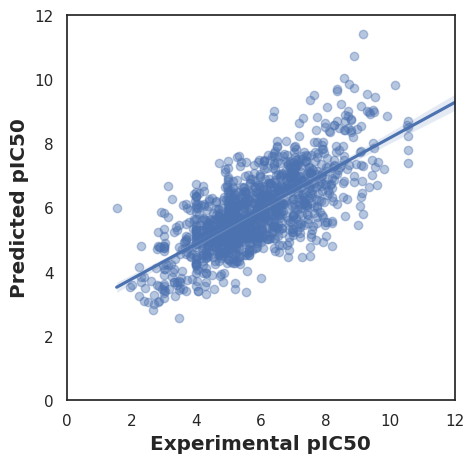

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show